# Final Project Presentation - Team JSG

## *Introduction*

We used the datasets provided by the WPRDC, we determined the following metrics to measure the best neighborhood in Pittsburgh:

- Poverty rate
- Employment rate
- Property values

The poverty rate would be a reflection of many things in a neighborhood, like public funding. The employment rate is important because no one wants a long commute to work, so if a neighborhood had high employment rates, then there are jobs nearby. Property values were included because it represents the overall living conditions/neighbors based off of financial status.

### Definition of "Bestness"

We defined the best neighborhood as the neighborhood with a best economic that repeated in these three analysis.

Which is the neighborhood have **lowest poverty rate**, **highest employment rate** and **highest property value**

### Metric

As mentioned above, our metric to measure "bestness" of the Pittsburgh Neighborhoods is the percentage of people above poverty level, the percentage of employment rate and average property value.

## *The Best Neighborhood*

### Poverty rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These are all the Pittsburgh neighborhood included in our dataset with test units number that **above the poverty line** and **below the poverty line**


In [2]:
data = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/7996d143-c155-466e-8414-115f74997dd7/download/poverty-status-of-individuals-in-the-past-12-months-by-living-arrangement.csv")
data.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Income in the past 12 months below poverty level:,Margin of Error; Income in the past 12 months below poverty level:,Estimate; Income in the past 12 months below poverty level: - In family households:,Margin of Error; Income in the past 12 months below poverty level: - In family households:,Estimate; Income in the past 12 months below poverty level: - In family households: - In married couple families:,Margin of Error; Income in the past 12 months below poverty level: - In family households: - In married couple families:,...,Estimate; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement:,Margin of Error; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement:,Estimate; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Householder:,Margin of Error; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Householder:,Estimate; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Householder: - Living alone,Margin of Error; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Householder: - Living alone,Estimate; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Householder: - Not living alone,Margin of Error; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Householder: - Not living alone,Estimate; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Other living arrangement,Margin of Error; Income in the past 12 months at or above poverty level: - In non-family households and other living arrangement: - Other living arrangement
0,Allegheny Center,1,1130.0,184.000000,516.0,195.000000,290.0,202.000000,163.0,195.000000,...,471.0,113.000000,375.0,85.000000,309.0,80.000000,66.0,38.000000,96.0,57.000000
1,Allegheny West,2,331.0,104.000000,45.0,26.000000,0.0,10.000000,0.0,10.000000,...,87.0,40.000000,79.0,36.000000,66.0,34.000000,13.0,13.000000,8.0,11.000000
2,Allentown,3,2624.0,499.013026,750.0,397.315995,490.0,400.251171,0.0,17.320508,...,394.0,136.638208,328.0,105.877287,274.0,98.208961,54.0,54.083269,66.0,56.964901
3,Arlington,4,1890.0,367.887211,343.0,160.626897,279.0,158.776573,97.0,96.046864,...,434.0,172.565929,230.0,71.679844,125.0,51.855569,105.0,49.608467,204.0,117.635029
4,Arlington Heights,5,380.0,196.000000,278.0,198.000000,257.0,196.000000,0.0,10.000000,...,47.0,38.000000,47.0,38.000000,47.0,38.000000,0.0,10.000000,0.0,10.000000
5,Banksville,6,3944.0,494.205423,252.0,175.835150,178.0,166.979041,118.0,152.983659,...,1218.0,260.618495,1057.0,228.155649,891.0,231.775754,166.0,80.950602,161.0,90.493094
6,Bedford Dwellings,7,1169.0,169.000000,815.0,196.000000,566.0,201.000000,113.0,133.000000,...,157.0,60.000000,152.0,59.000000,152.0,59.000000,0.0,10.000000,5.0,8.000000
7,Beechview,8,8081.0,751.370082,1473.0,435.621395,1146.0,428.893926,392.0,319.713935,...,1478.0,266.951306,1243.0,207.985576,994.0,180.244279,249.0,111.897274,235.0,109.799818
8,Beltzhoover,9,1885.0,337.761750,554.0,210.964452,323.0,191.319105,0.0,20.000000,...,209.0,74.040529,188.0,67.609171,184.0,67.609171,4.0,19.519221,21.0,29.866369
9,Bloomfield,10,8702.0,527.937496,1760.0,316.794886,392.0,189.881542,175.0,134.621692,...,3621.0,347.547119,2592.0,212.497059,1826.0,190.908355,766.0,142.355190,1029.0,211.135028


First,We remove the all the columns that were not necessary for our analysis. Then we renamed the columns name to a shorter one.



In [3]:
dt_filter = data.filter(regex="Margin")
data.drop(dt_filter.columns,axis=1)
data.dropna()
data = data[["Neighborhood","Estimate; Total:","Estimate; Income in the past 12 months at or above poverty level:","Estimate; Income in the past 12 months below poverty level:"]]

In [4]:
data = data.rename(columns={"Estimate; Total:":"Total","Estimate; Income in the past 12 months at or above poverty level:":"Above poverty level","Estimate; Income in the past 12 months below poverty level:":"Below poverty level"})

We calculate the proportion of the test unit number that above the poverty level and below the poverty level with the total test unit number. Then we remove the neighborhood that don't have enough samples for us to analysis the population.

In [5]:
data["Above poverty level"] = data["Above poverty level"] / data ["Total"] * 100
data["Below poverty level"] = data["Below poverty level"] / data ["Total"] * 100

In [6]:
fiter_above = (data["Total"] * data["Above poverty level"]) > 10
fiter_below = (data["Total"] * data["Below poverty level"]) > 10

filter_combine = fiter_above & fiter_below
data = data[filter_combine]

This is the neighborhoods that have the lowest poverty rate.

In [7]:
data.sort_values(by=["Above poverty level"],ascending=False)

,Neighborhood,Total,Above poverty level,Below poverty level
82,Swisshelm Park,1286.0,96.034215,3.965785
57,North Shore,187.0,95.721925,4.278075
55,New Homestead,933.0,95.498392,4.501608
80,Strip District,689.0,95.210450,4.789550
5,Banksville,3944.0,93.610548,6.389452
...,...,...,...,...
83,Terrace Village,1632.0,41.911765,58.088235
19,Central Oakland,5064.0,30.785940,69.214060
6,Bedford Dwellings,1169.0,30.282293,69.717707
4,Arlington Heights,380.0,26.842105,73.157895


This is the neighborhoods that have the highest poverty rate.

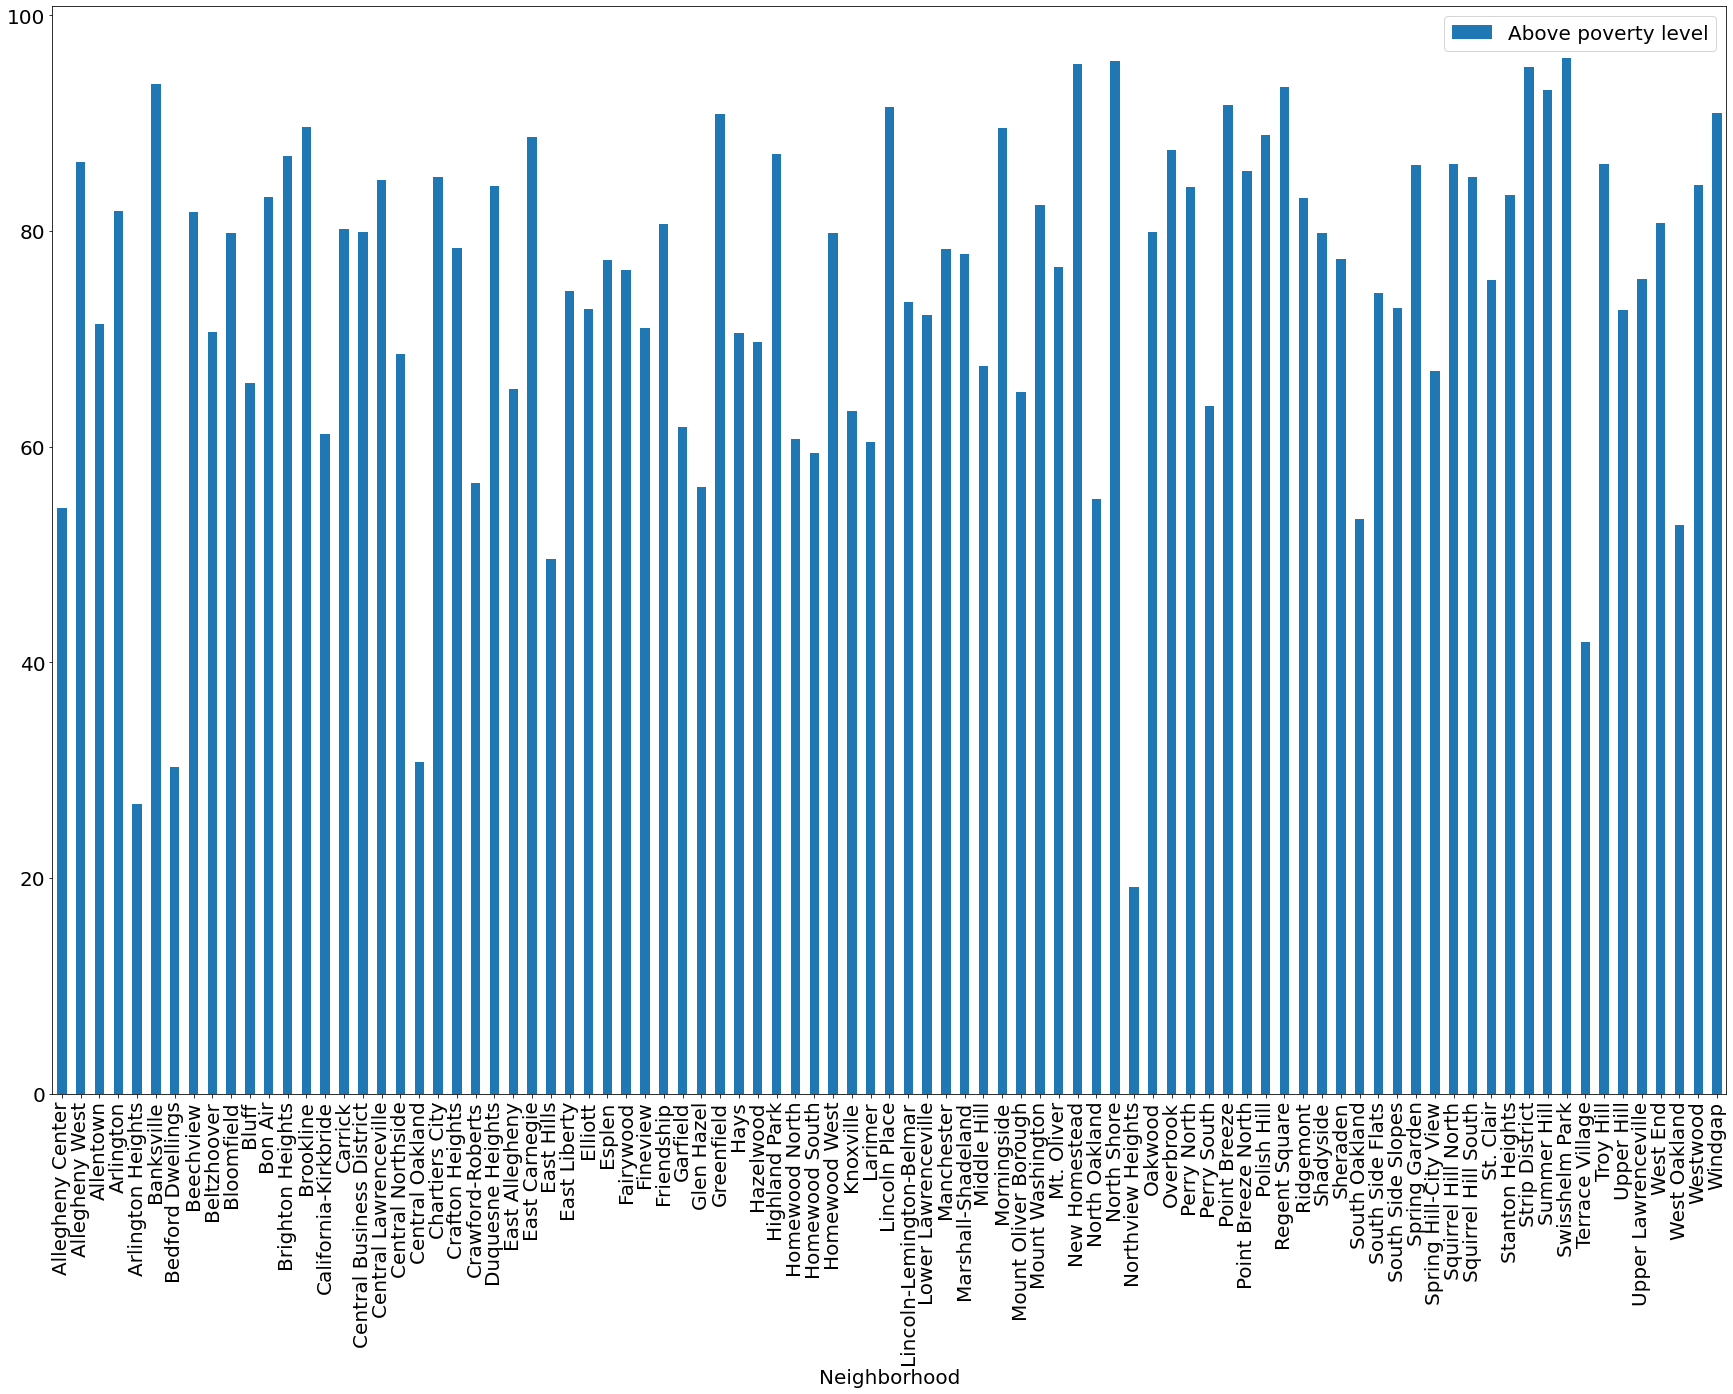

In [8]:
plt.rcParams.update({'font.size': 20})
new = data[["Neighborhood","Above poverty level"]]
new.plot(x='Neighborhood', kind='bar', rot=90, figsize = (30,20))

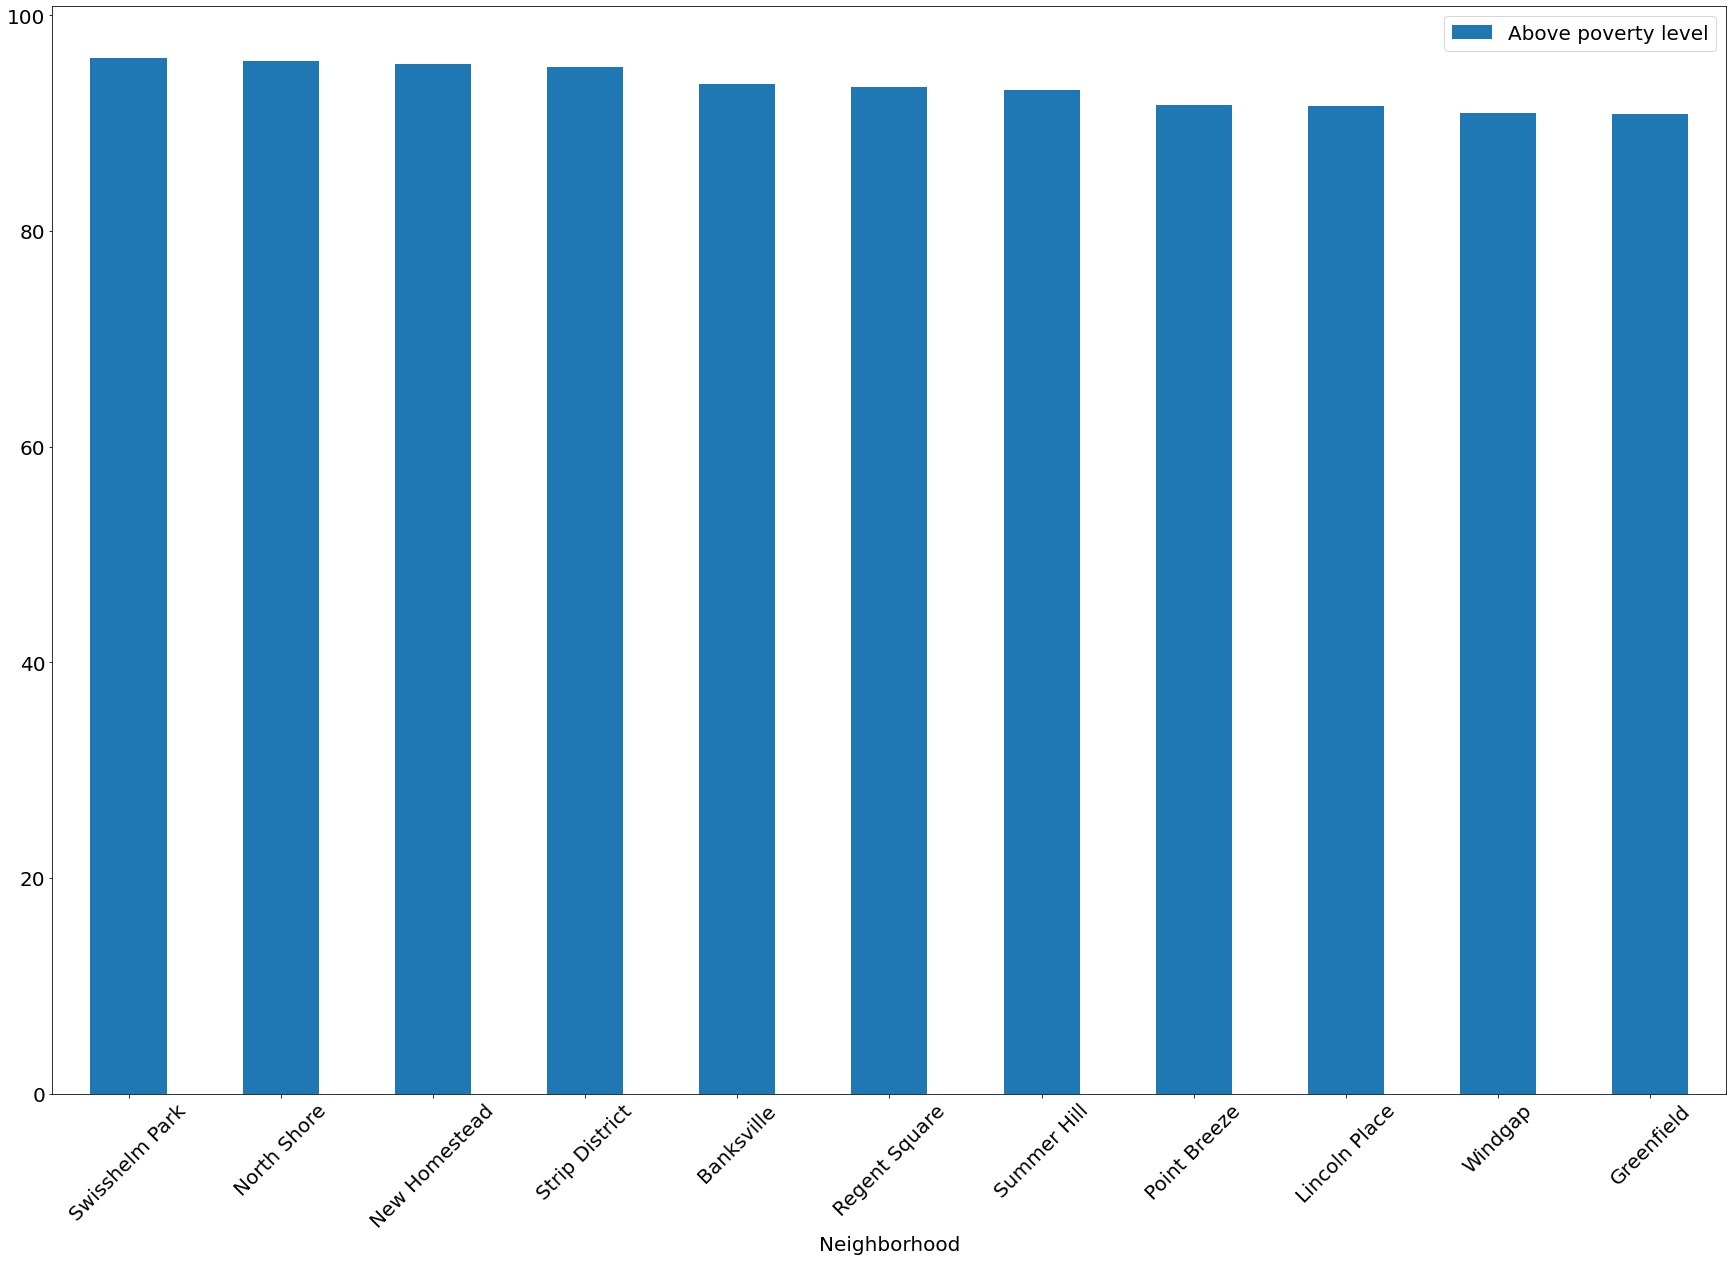

In [9]:
above = new.loc[new["Above poverty level"]>90]
above = above.sort_values(by=["Above poverty level"],ascending=False)
above.plot(x='Neighborhood', kind='bar', rot=45, figsize = (30,20))

To narrow down the search for the best neighborhood,we limit to the above poverty level rate to **90%**. There is the graph included the neighborhood that have less poverty rate.

### Employment Rate

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/d53bfc16-9518-4c5b-b102-847654dabe21/download/employment-status-for-the-population-16-years-and-over.csv")

This is the dataset used. It's the employment status for people over 16 years and older in all the neighborhoods in Pittsburgh.

In [12]:
emprate = (df['Estimate; In labor force: - Civilian labor force: - Employed'] / df['Estimate; Total:'] * 100)
unemprate  = (df['Estimate; In labor force: - Civilian labor force: - Unemployed'] / df['Estimate; Total:'] * 100)

The dataset came with a lot of columns, and only gave raw numbers for how many people were employed, unemployed, etc. So here, I calculated both employment rates and unemployment rates of the civilian labor force instead of, for example, military labor because none of us are in the military and they make up a small portion of the population in each neighborhood anyways.

In [13]:
df['Employment Rate'] = emprate
df.filter(["Neighborhood", "Estimate; Total:", "Estimate; In labor force: - Civilian labor force: - Employed", "Estimate; In labor force: - Civilian labor force: - Unemployed", "Employment Rate"])

,Neighborhood,Estimate; Total:,Estimate; In labor force: - Civilian labor force: - Employed,Estimate; In labor force: - Civilian labor force: - Unemployed,Employment Rate
0,Allegheny Center,993.0,579.0,35.0,58.308157
1,Allegheny West,334.0,221.0,9.0,66.167665
2,Allentown,1922.0,841.0,244.0,43.756504
3,Arlington,1584.0,991.0,117.0,62.563131
4,Arlington Heights,211.0,80.0,9.0,37.914692
...,...,...,...,...,...
86,Upper Lawrenceville,2359.0,1518.0,119.0,64.349301
87,West End,275.0,186.0,14.0,67.636364
88,West Oakland,1544.0,656.0,137.0,42.487047
89,Westwood,2961.0,1798.0,128.0,60.722729


This is the chart of the neighborhoods with the total population of each neighborhood, the numbers for employed and unemployed, and the calculated labor force. I filtered out a lot of columns, like estimate of error margins, and as stated before, the military employment and umemployment. Even though I calculated unemployment rate as well, I was initially planning on doing a stacked bar graph so we can see total, employment rate, and unemployment rate, but I didn't feel like I could do it well enough in time.



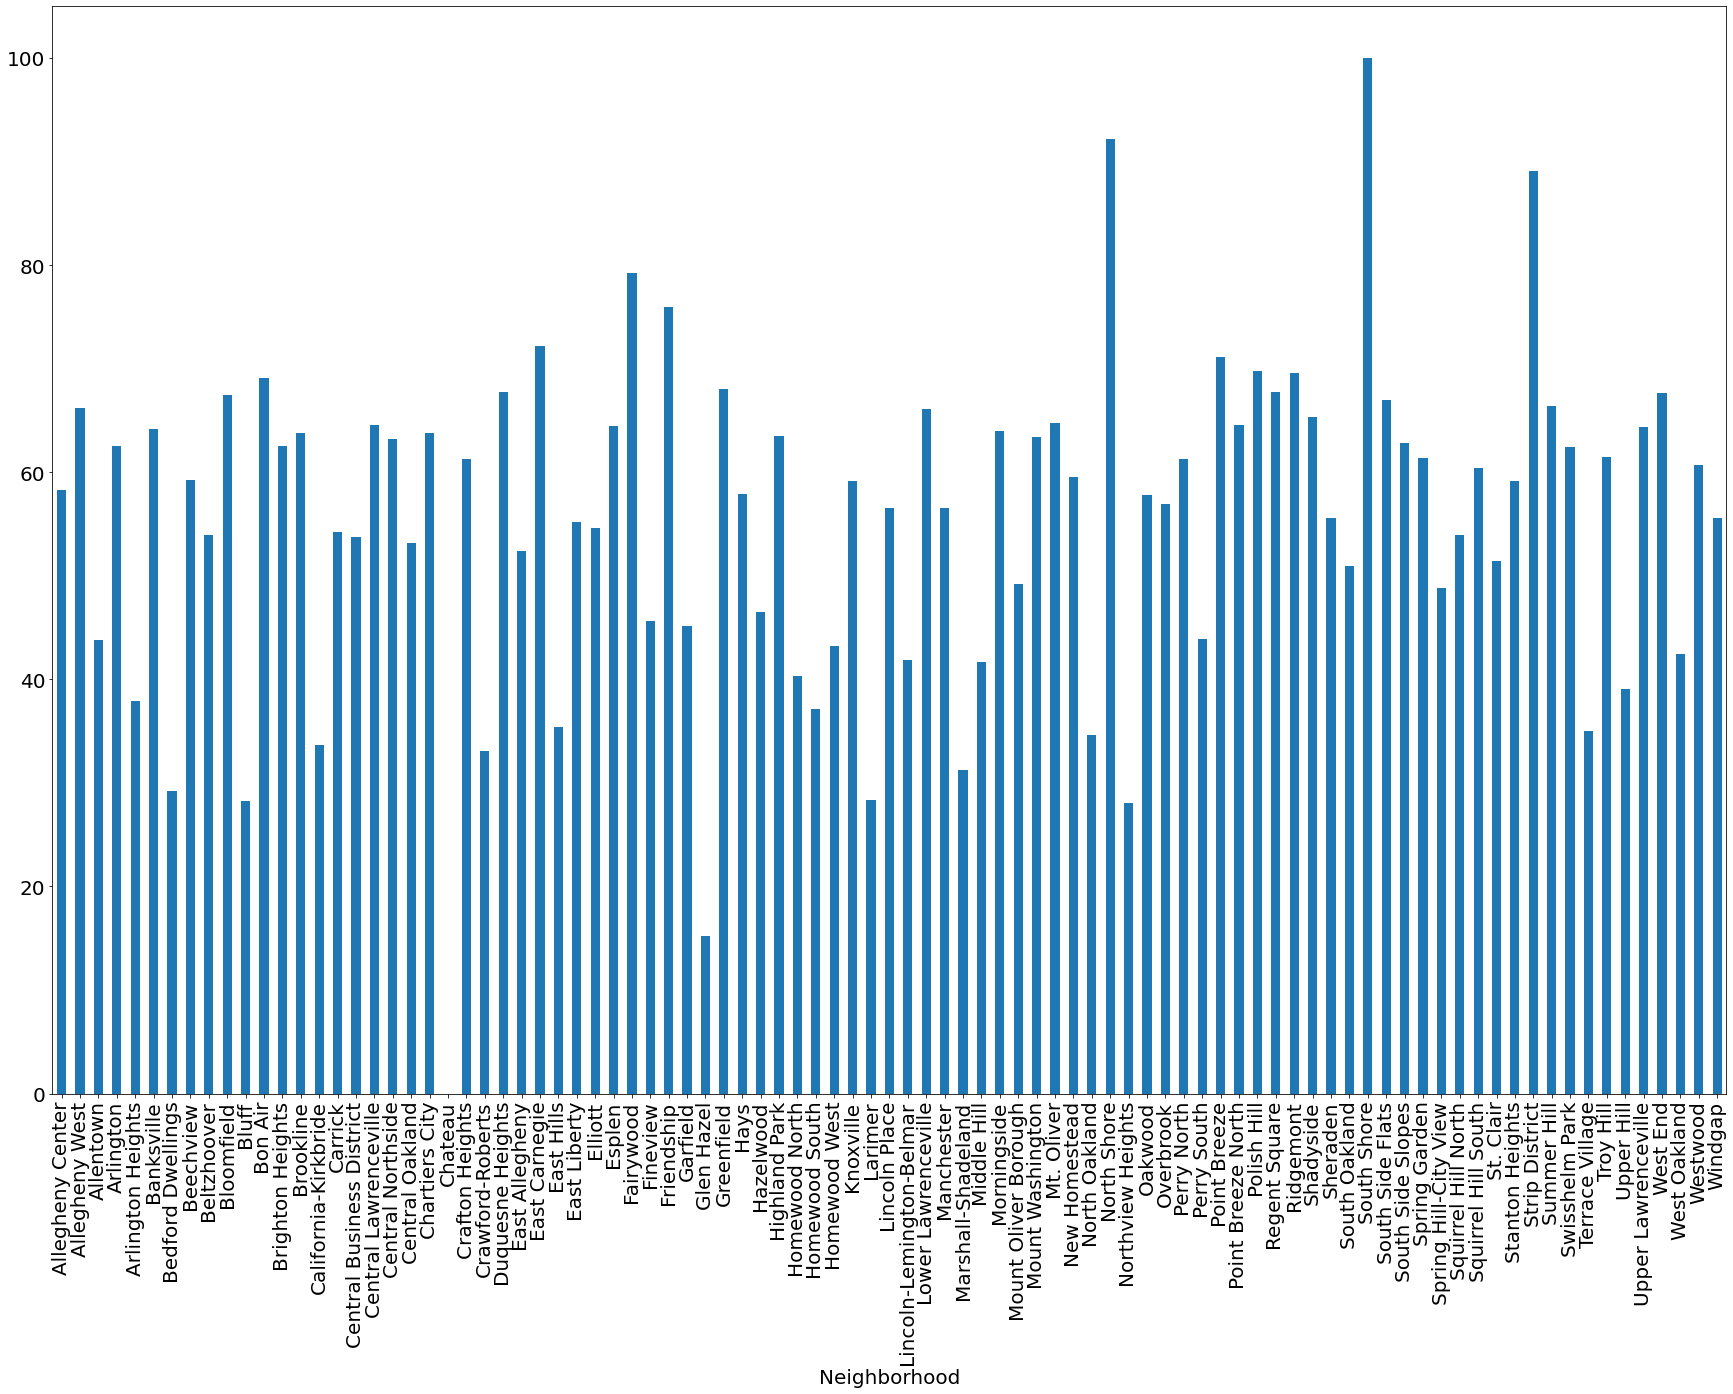

In [14]:
df.groupby('Neighborhood').agg('Employment Rate').sum().plot(kind='bar', x='Neighborhood', y='Employment Rate', rot=90, figsize = (30,20))

This is the bar chart depicting all of the neighborhoods and their employment rates. It's a bit hard to read, so next I just showed the top ten employment rates.

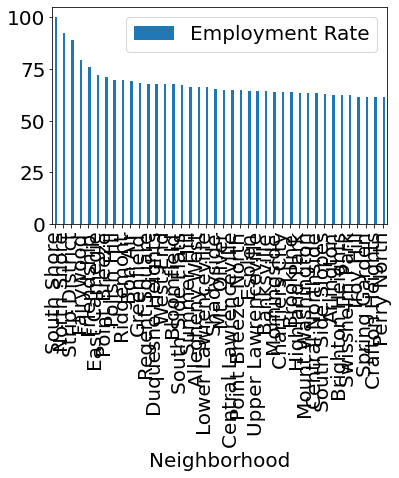

In [15]:
df.sort_values(by='Employment Rate', ascending=False).head(40).plot(kind='bar', x='Neighborhood', y='Employment Rate', align='edge', width=0.3)


By this metric alone, we can see that the South Shore neighborhood is the best neighborhood in Pittsburgh. However, it is a business district. Looking at this graph and exluding those, the best neighborhood by my metric is Fairywood. I am not from here, but from what I've heard, I'm suprised that it was not a well-known neighborhood like Shadyside. Although, this dataset is from 2014, and a lot of neighborhoods can change in six years. A high employment rate in a neighborhood is something to look for because it reflects the state of that neighborhood and generally means more investment/better economy in this area which means better community facilities, low commuting time, etc.

### Property Values

To determine the best neighborhood, I started by analyzing the data regarding property sales from the past 8 years.

In [16]:
#imports
import pandas as pd
#expands dataframe in panda
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
# import geopandas as gpd
import matplotlib.pyplot as plt

#import data from csv
dtype = {'user_id': int}
transactions = pd.read_csv("https://data.wprdc.org/datastore/dump/5bbe6c55-bce6-4edb-9d04-68edeb6bf7b1")

#drop irrelevant columns and only locate houses in Pitt
transactions = transactions.drop(columns = ["PARID", "PROPERTYHOUSENUM", 'PROPERTYFRACTION', 'PROPERTYADDRESSDIR', 
                                            'PROPERTYADDRESSUNITDESC', 'PROPERTYUNITNO', 'PROPERTYSTATE', 'SCHOOLCODE', 
                                            'SCHOOLDESC', 'MUNICODE', 'RECORDDATE', 'DEEDBOOK', 'DEEDPAGE', 'SALECODE', 
                                            'SALEDESC', 'INSTRTYP', 'INSTRTYPDESC'])
transactions = transactions.loc[transactions["PROPERTYCITY"] == 'PITTSBURGH']

#match & replace wards with neighborhood names (courtesy of https://apps.alleghenycounty.us/website/munipgh.asp)
transactions = transactions.replace({       "1st Ward - PITTSBURGH": "Lower Hill District 1",
                                            "2nd Ward - PITTSBURGH": "Strip District", 
                                            "3rd Ward - PITTSBURGH": "Lower Hill District 2", 
                                            "4th Ward - PITTSBURGH": "Oakland - Soho", 
                                            "5th Ward - PITTSBURGH": "Upper Hill District", 
                                            "6th Ward - PITTSBURGH": "Polish Hill", 
                                            "7th Ward - PITTSBURGH": "Shadyside", 
                                            "8th Ward - PITTSBURGH": "Bloomfield", 
                                            "9th Ward - PITTSBURGH": "Lawrenceville", 
                                            "10th Ward - PITTSBURGH": "Morningside, Garfield", 
                                            "11th Ward - PITTSBURGH": "East End Mall/Highland Park", 
                                            "12th Ward - PITTSBURGH": "East Liberty", 
                                            "13th Ward - PITTSBURGH": "Homewood", 
                                            "14th Ward - PITTSBURGH": "Point Breeze/Squirrel Hill/Frick Park", 
                                            "15th Ward - PITTSBURGH": "Hazelwood/Greenfield", 
                                            "16th Ward - PITTSBURGH": "Parts of Southside", 
                                            "17th Ward - PITTSBURGH": "Parts of Southside", 
                                            "18th Ward - PITTSBURGH": "Allentown/Beltzhoover", 
                                            "19th Ward - PITTSBURGH": "Brookline/Mt. Washington/Beechview", 
                                            "20th Ward - PITTSBURGH": "West End/Corliss", 
                                            "21st Ward - PITTSBURGH": "Manchester", 
                                            "22nd Ward - PITTSBURGH": "North Side", 
                                            "23rd Ward - PITTSBURGH": "Latimer Jr High - Heinz Co. Area", 
                                            "24th Ward - PITTSBURGH": "Troy Hill/Spring Garden", 
                                            "25th Ward - PITTSBURGH": "Fineview", 
                                            "26th Ward - PITTSBURGH": "Perrysville/Riverview", 
                                            "27th Ward - PITTSBURGH": "Woods Run/Brighton Road", 
                                            "28th Ward - PITTSBURGH": "Chartiers/Westwood/Esplen/Crafton Hts.", 
                                            "29th Ward - PITTSBURGH": "Carrick", 
                                            "30th Ward - PITTSBURGH": "Knoxville", 
                                            "31st Ward - PITTSBURGH": "Hays/Lincoln Place", 
                                            "32nd Ward - PITTSBURGH": "Overbrooke"})

#drop prices not correlating to property in residential areas
transactions = transactions[transactions["PRICE"] > 10000]

#chart
pdtransactions = pd.DataFrame(transactions)
pdtransactions.head(10)

c:\users\scott\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYCITY,PROPERTYZIP,MUNIDESC,SALEDATE,PRICE
4,CARNEGIE,ST,PITTSBURGH,15201.0,"Morningside, Garfield",2015-02-04,27541.0
11,BOGGSTON,AVE,PITTSBURGH,15210.0,Allentown/Beltzhoover,2020-07-09,10500.0
18,WILTSIE,ST,PITTSBURGH,15206.0,East Liberty,2017-05-09,30000.0
21,CHURCH,ST,PITTSBURGH,15218.0,Swissvale,2017-09-29,2000000.0
25,SMITHFIELD,ST,PITTSBURGH,15222.0,Strip District,2012-08-16,630000.0
32,DAWSON,ST,PITTSBURGH,15213.0,Oakland - Soho,2013-04-23,157000.0
33,TRAYMORE,AVE,PITTSBURGH,15216.0,Brookline/Mt. Washington/Beechview,2019-03-06,18000.0
34,TRAYMORE,AVE,PITTSBURGH,15216.0,Brookline/Mt. Washington/Beechview,2019-03-06,18000.0
35,TRAYMORE,AVE,PITTSBURGH,15216.0,Brookline/Mt. Washington/Beechview,2019-03-06,18000.0
37,SHARON,DR,PITTSBURGH,15221.0,Forest Hills,2012-04-17,63000.0


The data above shows individual properties, their location, date of sale, and the prices they were sold at. I dropped columns irrelevant to this analysis and removed all neighborhoods outside of Pittsburgh still within the boundaries of Allegheny county as our focus is on Pittsburgh alone.

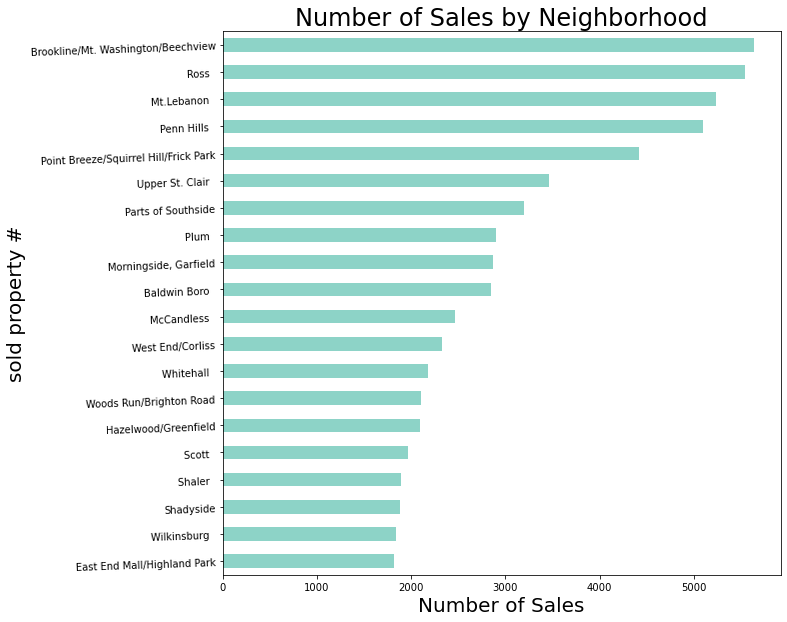

In [17]:
#group data by neighborhood & count number of sales in each
numberOfSales = transactions.loc[transactions["PRICE"] >= 10000].groupby("MUNIDESC").size().sort_values()

#set up graph
plt.xlabel("Number of Sales")
plt.ylabel("Neighborhood")
plt.style.use("dark_background")

#top 20 neighborhoods with the highest sale number
numberOfSales.tail(20).plot(kind = "barh", title = "Number of Sales by Neighborhood", 
                           ylabel = "neighborhood", xlabel = "sold property #", rot = 2, fontsize = 10, figsize = (10,10))

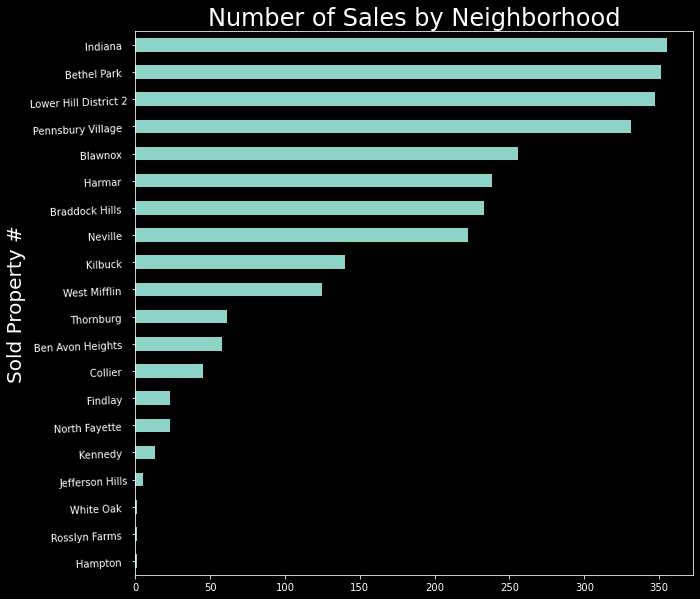

In [18]:
#top 20 neighborhoods with the lowest sale number
numberOfSales.head(20).plot(kind = "barh", title = "Number of Sales by Neighborhood",  
                            ylabel = "Neighborhood", xlabel = "Sold Property #", rot = 2, fontsize = 10, figsize = (10,10))

The two graphs above illustrate the total number of sales per neighborhood. This data could be interpreted as either the 'desirability' of the property in each neighborhood as the demand is high but could also be interpreted as people cycling out of the neighborhood easily.

In [19]:
#sum of prices by neighborhood
theSum = transactions.groupby("MUNIDESC")["PRICE"].sum()
theSum = theSum.astype(int)
print(theSum)

MUNIDESC
1st Ward  - PITTSBURGH                     624166477
Allentown/Beltzhoover                      151477080
Aspinwall                                  151575696
Avalon                                     111002880
Baldwin Boro                               417966838
Baldwin Twp                                 50385409
Bellevue                                   194931707
Ben Avon                                    77537759
Ben Avon Heights                            22582432
Bethel Park                                 87775175
Blawnox                                     35377992
Bloomfield                                 400630124
Braddock Hills                              31746932
Brentwood                                  183472645
Brookline/Mt. Washington/Beechview         909944628
Carrick                                    129215438
Castle Shannon                             210223884
Chartiers/Westwood/Esplen/Crafton Hts.     198536468
Churchill                            

Next, to find the average property value of each neighborhood based on sales, I found the sum of all property sales in each neighborhood, listed above in US dollars

In [20]:
#number of sales by neighborhood
numOfSales = transactions.loc[: "MUNIDESC"]
numOfSales = numOfSales.replace({"MUNIDESC": "Neighborhoods"})
print(numberOfSales)

MUNIDESC
Hampton                                      1
Rosslyn Farms                                1
White Oak                                    1
Jefferson Hills                              5
Kennedy                                     13
North Fayette                               23
Findlay                                     23
Collier                                     45
Ben Avon Heights                            58
Thornburg                                   61
West Mifflin                               125
Kilbuck                                    140
Neville                                    222
Braddock Hills                             233
Harmar                                     238
Blawnox                                    256
Pennsbury Village                          331
Lower Hill District 2                      347
Bethel Park                                351
Indiana                                    355
Ben Avon                                   356
Bald

Above is the total list of the number of properties sold per neighborhood, illustrated earlier by the two bar graphs

In [21]:
#find average price of each neighborhood
avg_price = theSum / numberOfSales
avg_price = avg_price.astype(int)

pdavg_price = pd.DataFrame(avg_price)
pdavg_price.head(91)

,0
MUNIDESC,
1st Ward - PITTSBURGH,1402621
Allentown/Beltzhoover,115808
Aspinwall,287619
Avalon,122926
Baldwin Boro,146706
Baldwin Twp,132943
Bellevue,148124
Ben Avon,217802
Ben Avon Heights,389352


Using the total sum of property sales and the total number of properties sold, I found the average property value of each neighborhood. Since our metric is defined by financial wellbeing, the higher the average, the better the neighborhood.

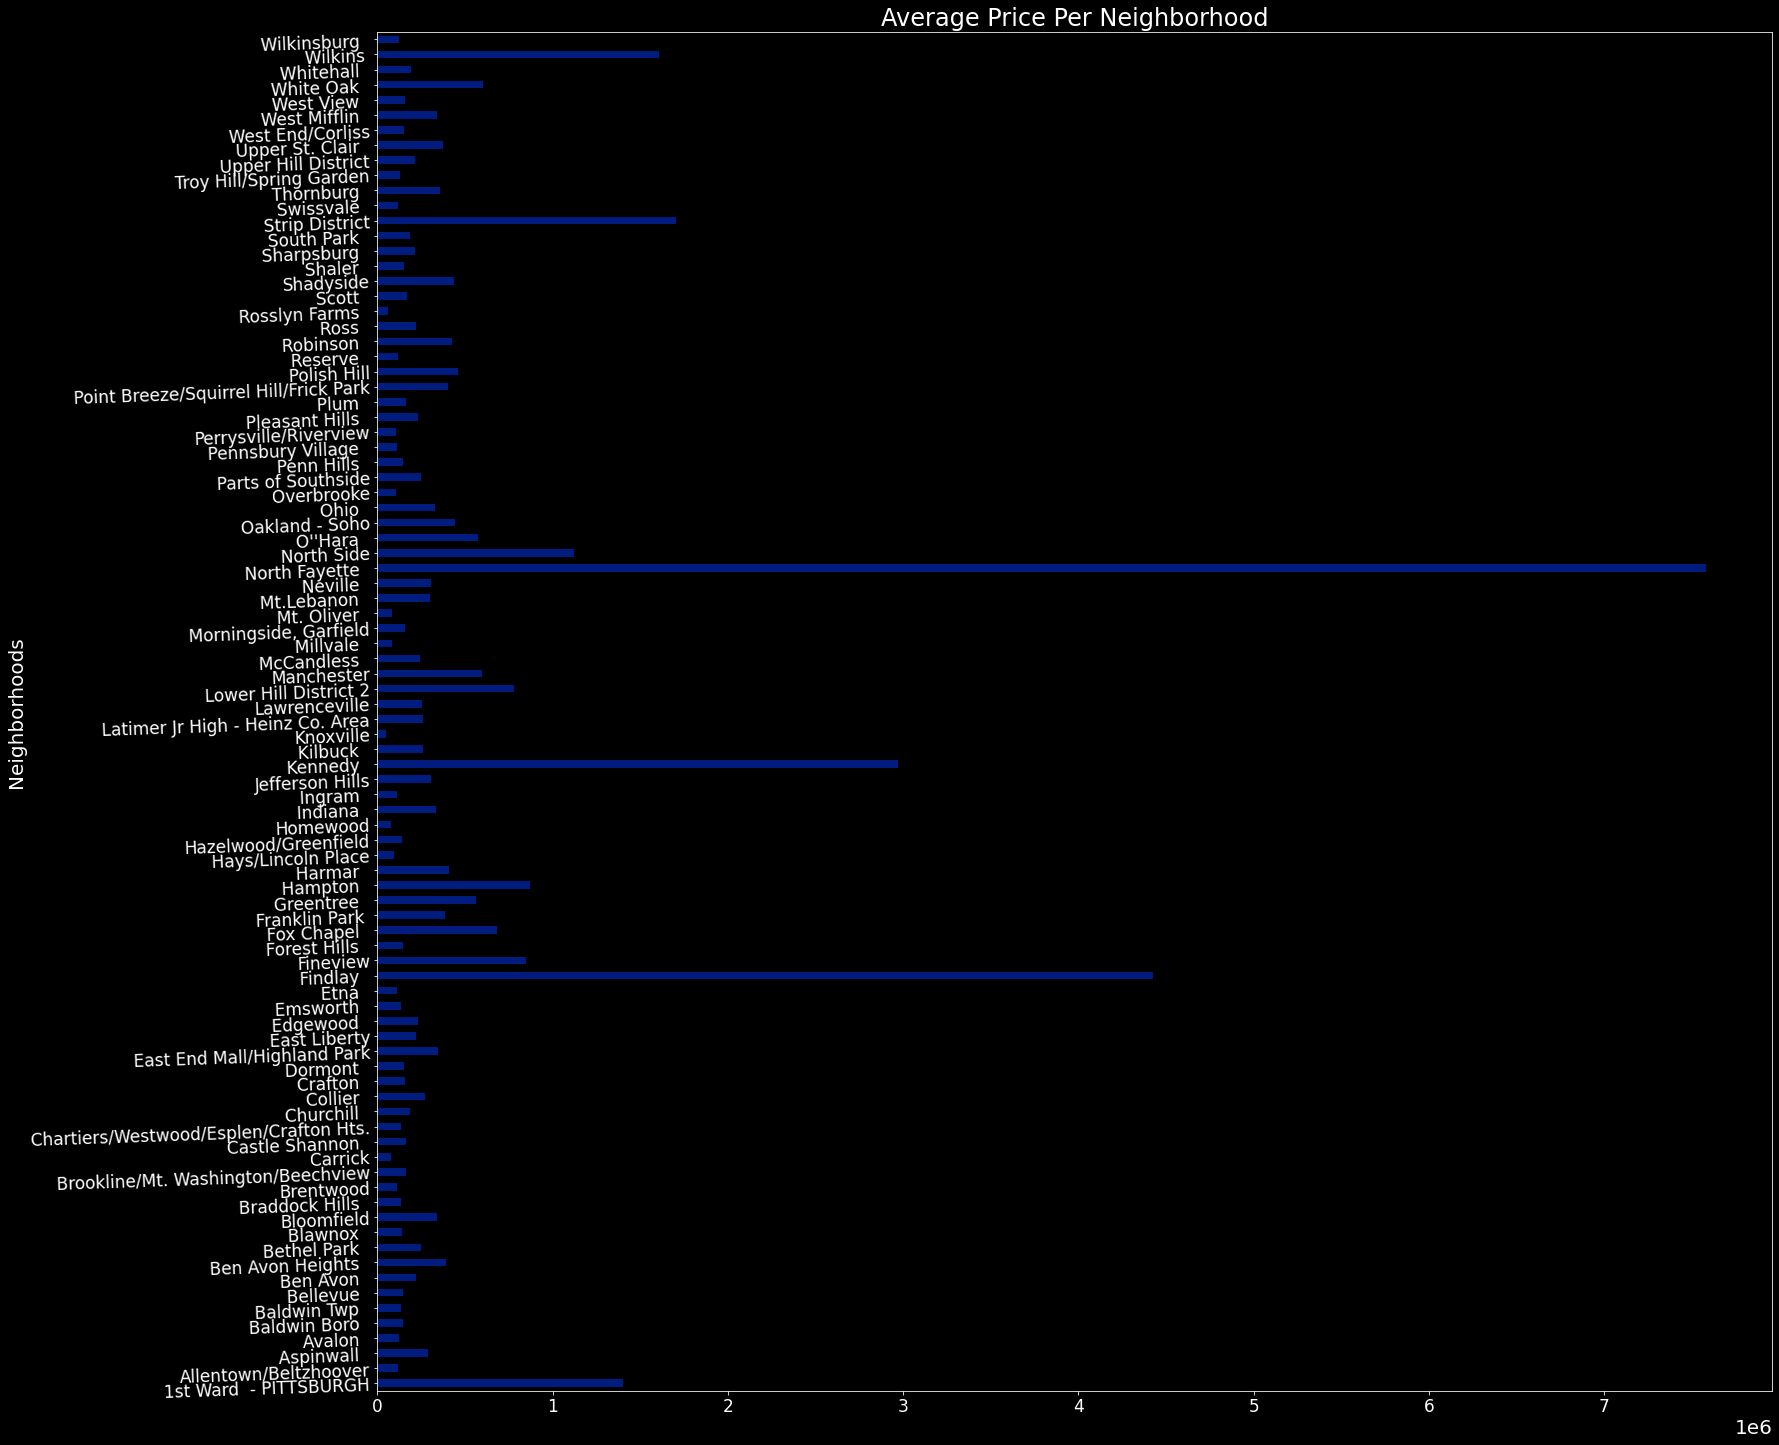

In [22]:
plt.style.use("seaborn-dark-palette")
avg_price.head(90).plot(kind = 'barh', title = "Average Price Per Neighborhood", 
                        ylabel = "Average $ (in scientific notation)", xlabel = "Neighborhoods", rot = 2, fontsize = 17, figsize = (25,25))

The bar graph above portrays the average property value of each neighborhood in Pittsburgh.

The neighborhoods with the highest average property value according to this data set is North Fayette, Findlay, and Kennedy with an average of $7.579.706,and $2.972.374 respectively. 

## Conclusion

Base on the analysis, we looked at which neighborhood repeated throughout each dataset as the neighborhood with the best economy. The **North Shore** appears on two of the dataset Employment Rate graph and Poverty rate graph as top 3.Although North Shore is not appeared on the Property values graph, there is a few neighborhood that are really close to  North Shore on the map like strip district and north side in Property values analysis. They are also the top 10 in property values graph.That's why north shore is our best neighborhood.

**Property values**

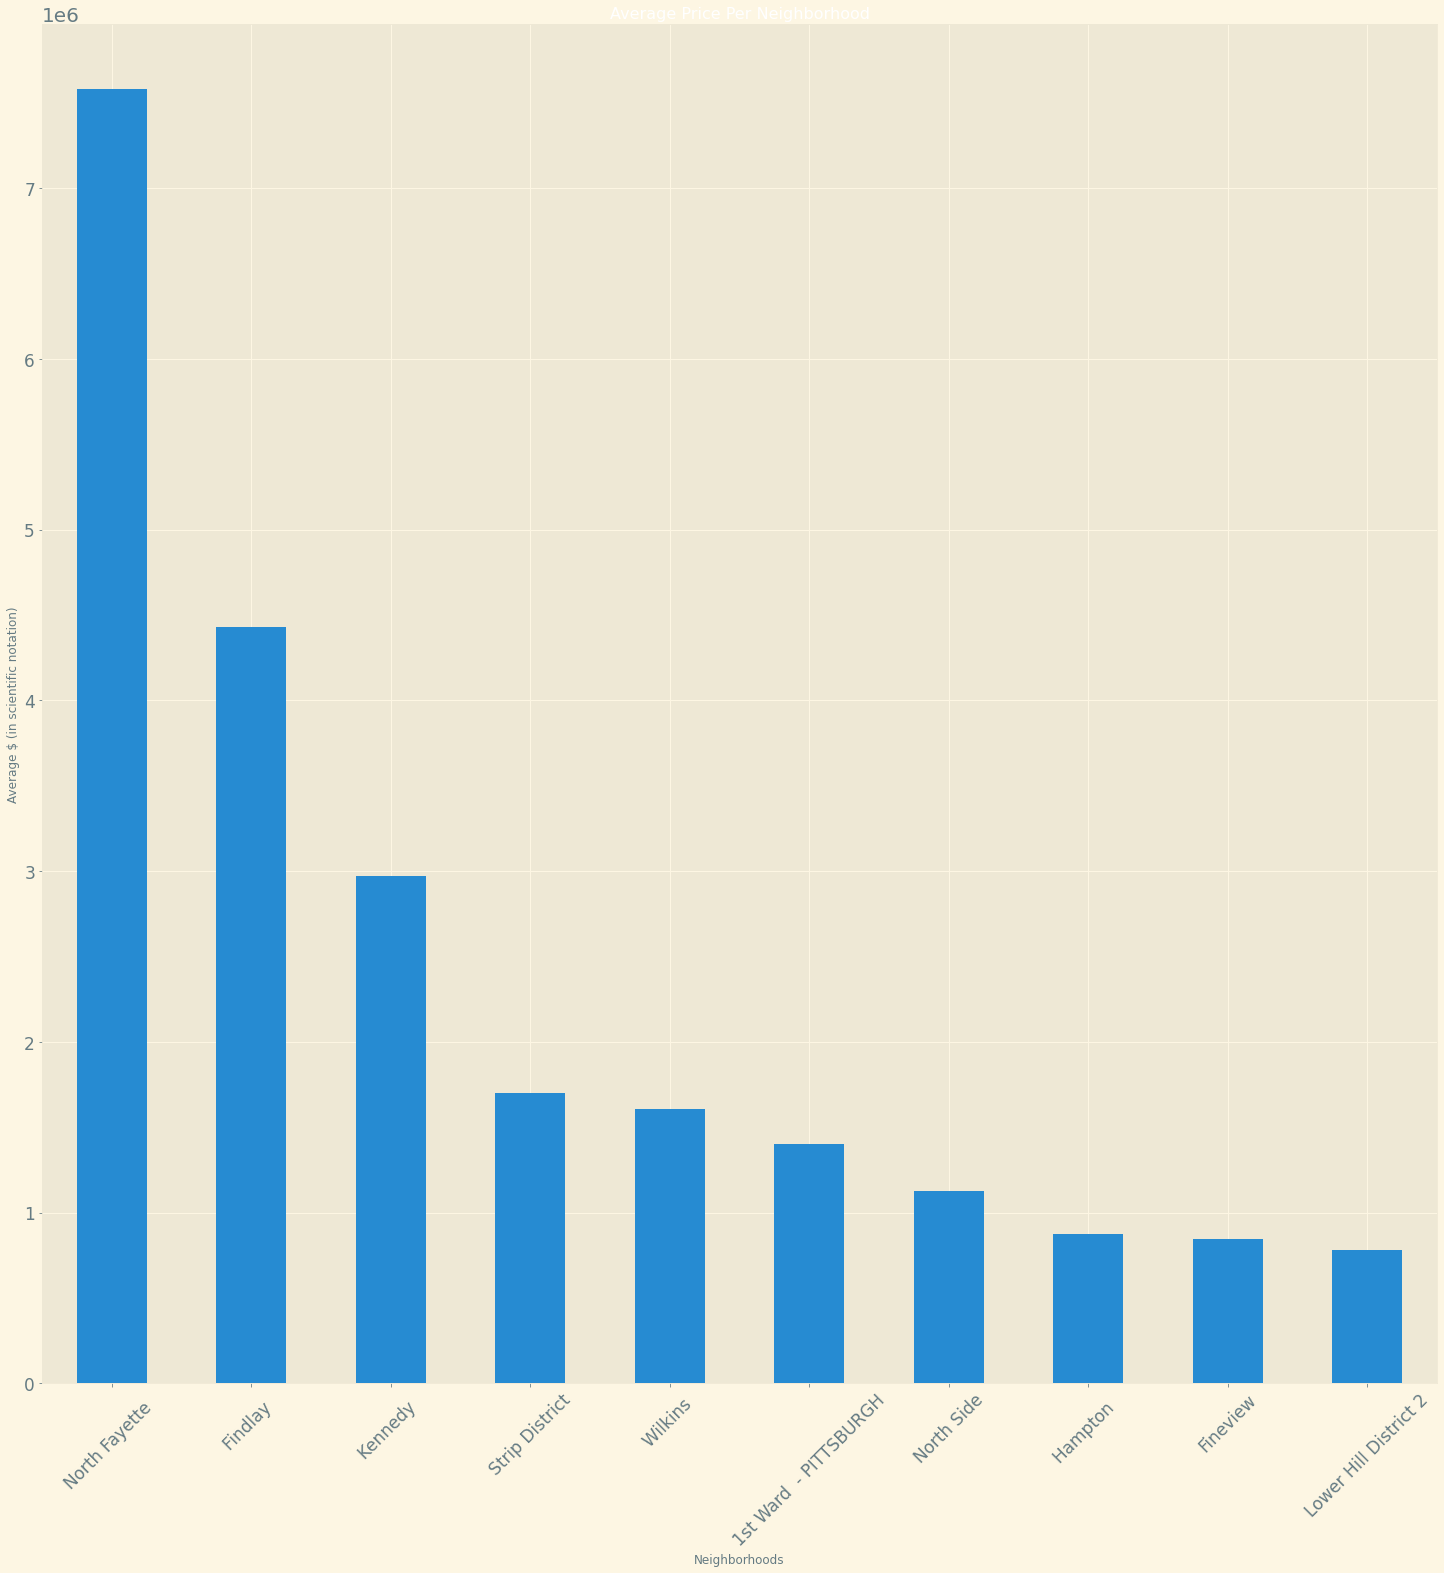

In [23]:
avg_price = avg_price.sort_values(ascending=False)
plt.style.use("Solarize_Light2")
avg_price.head(10).plot(kind = 'bar', title = "Average Price Per Neighborhood", 
                        ylabel = "Average $ (in scientific notation)", xlabel = "Neighborhoods", rot =45, fontsize = 17, figsize = (25,25))

**Employment rate**

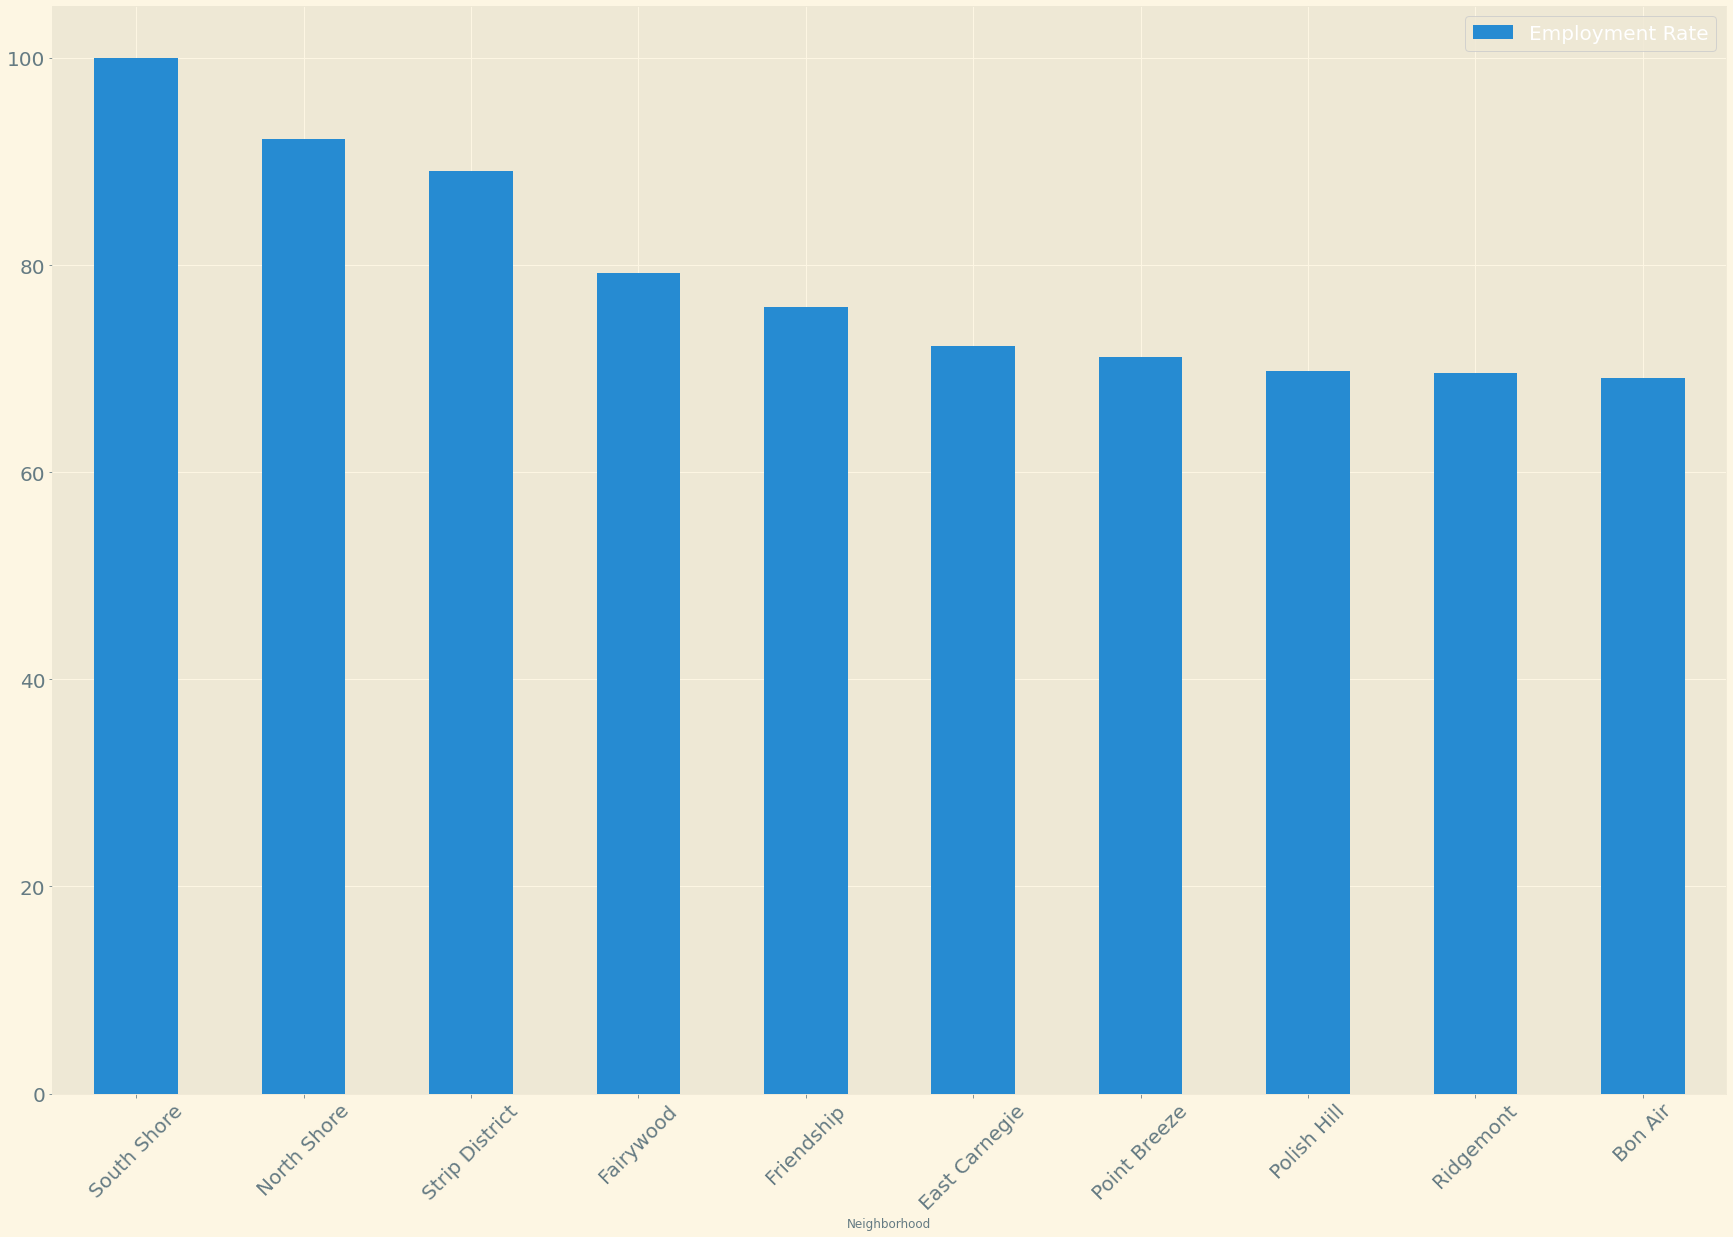

In [24]:
df.sort_values(by='Employment Rate', ascending=False).head(10).plot(rot=45, figsize = (30,20),kind='bar', x='Neighborhood',y='Employment Rate')

**Poverty rate**

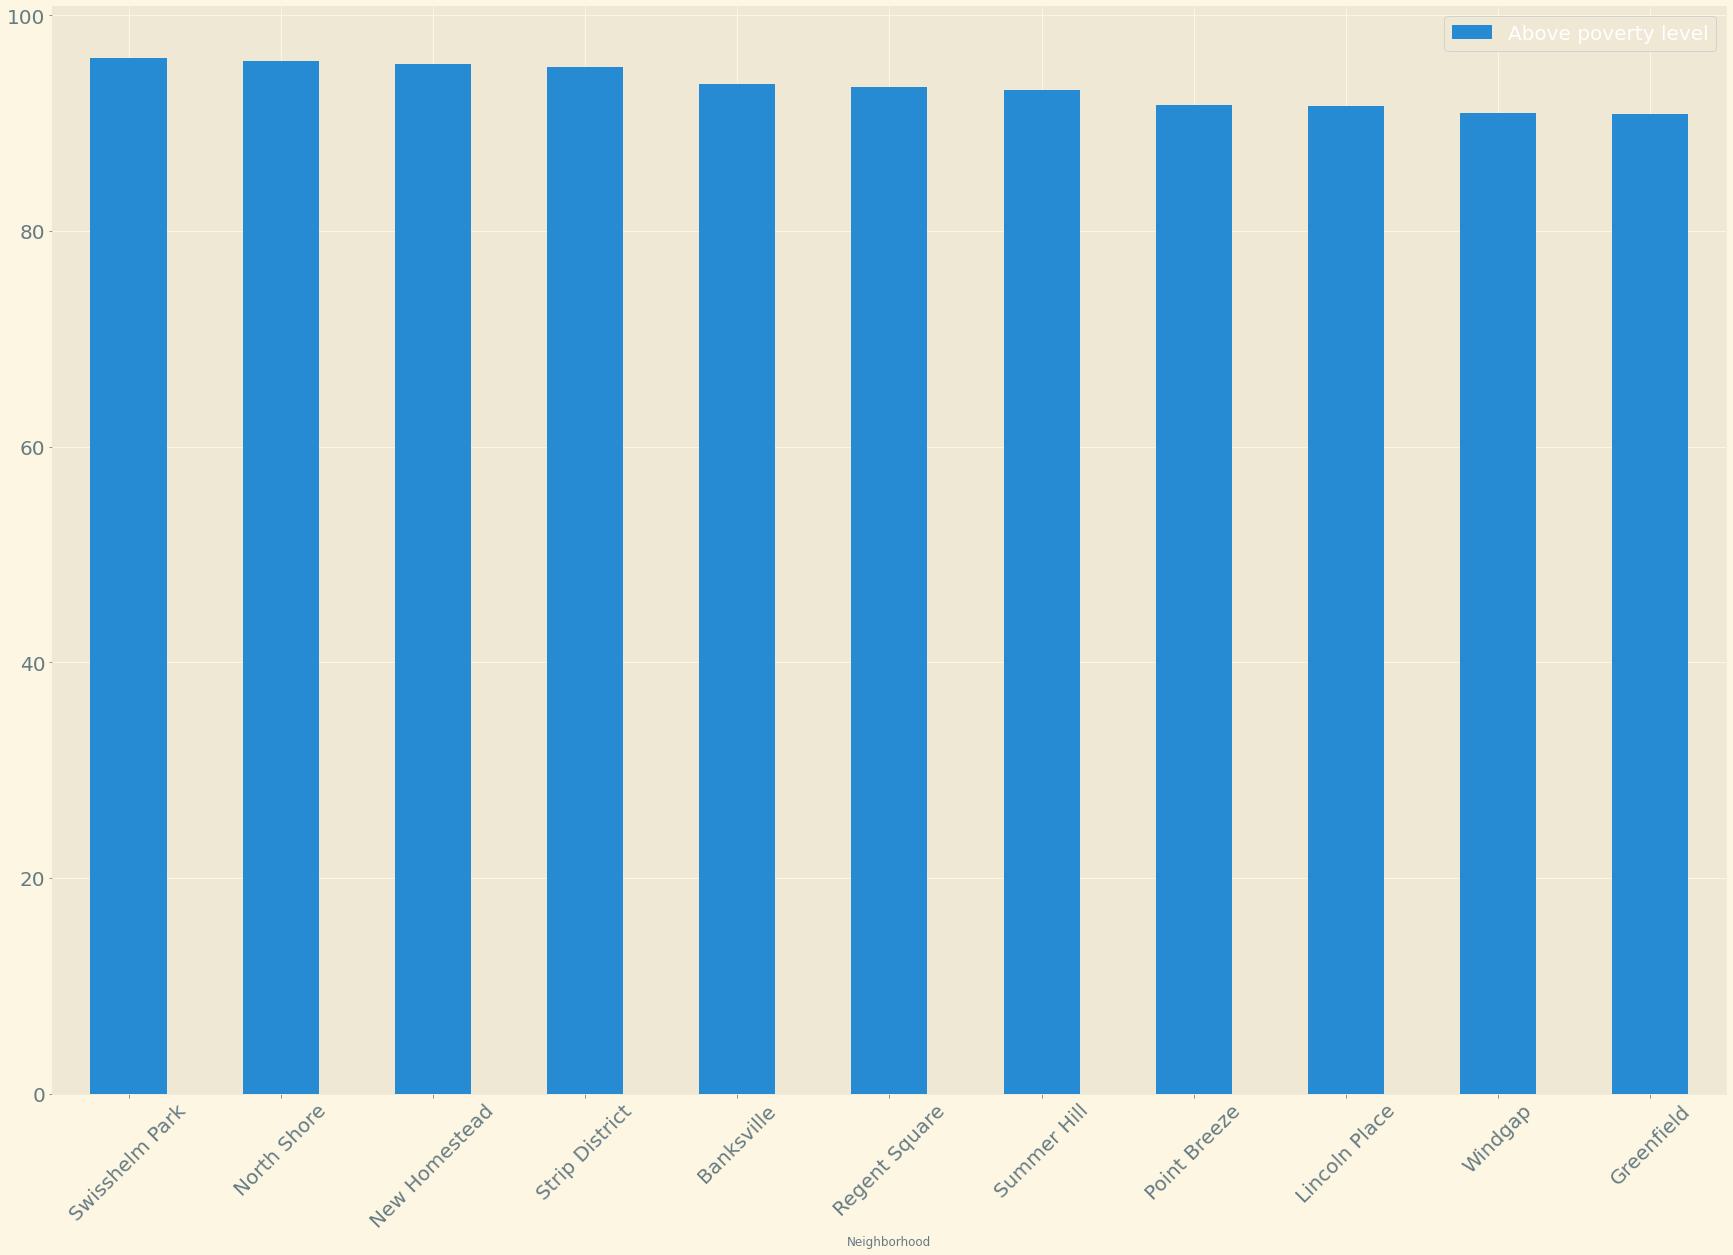

In [25]:
above.plot(x='Neighborhood', kind='bar', rot=45, figsize = (30,20))